# EDA Section

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as date
plt.style.use('default')
#current date for naming convention of data

today_string = str(date.today().year) + '' + str(date.today().month) + '' + str(date.today().day)

In [623]:
df = pd.read_csv(f'neubaukompass_{today_string}.csv', index_col = 0)

In [624]:
df.shape

(719, 14)

### Plotting Most Active Devs

In [625]:
devs = df.groupby('developer', as_index = False).count()

In [626]:
devs = devs.sort_values(by = 'address', ascending=True)

In [627]:
devs.head()

,developer,address,city,completion,image_location,name,price,size,subtitle,min_price,max_price,min_size,max_size,completion_year
0,1a-seaview Projektentwicklung,1,1,1,1,1,1,1,1,1,1,1,1,1
248,NEST Ecoprojekt WA3 GmbH& Co. KG,1,1,1,1,1,1,1,1,1,1,1,1,1
247,NAGEL PROPERTIES,1,1,1,1,1,1,1,1,1,1,1,1,1
246,Münchenbau,1,1,1,1,1,1,1,1,1,1,1,1,1
245,Moser-Immobilien-Management e.K.,1,1,1,1,1,1,1,1,1,1,1,1,1


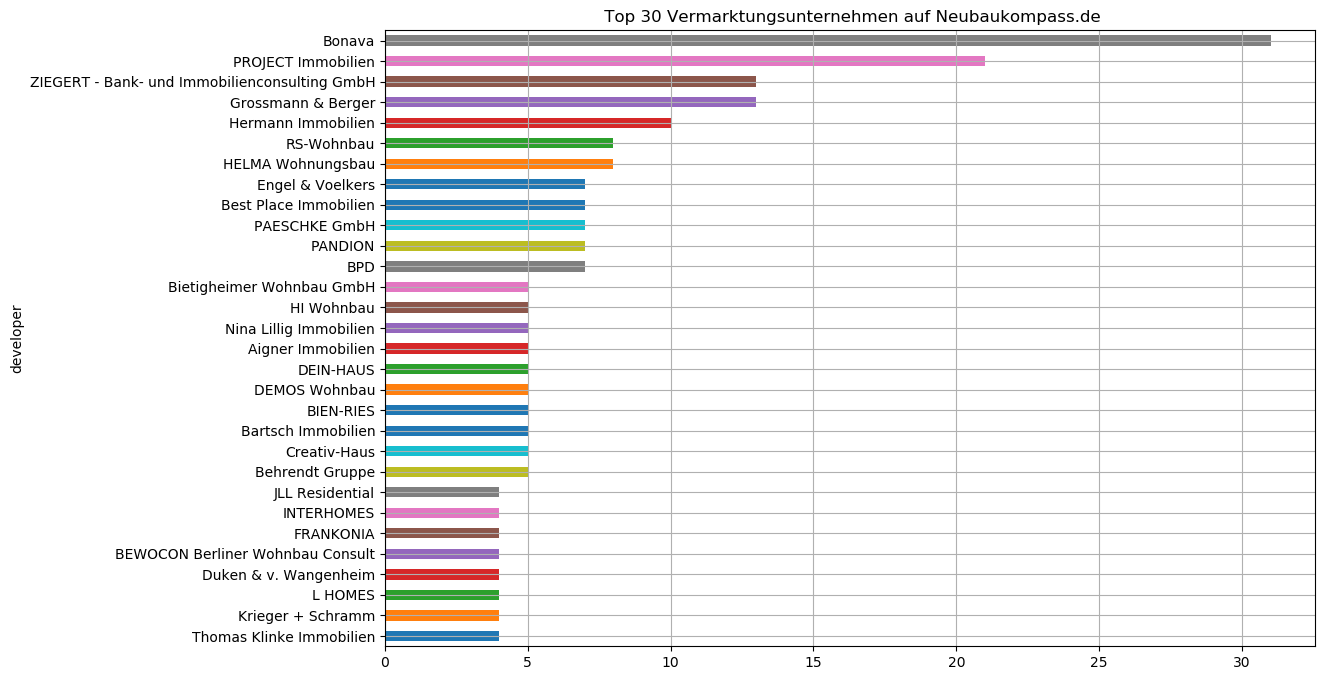

In [628]:
devs[-30::].plot(kind = 'barh', x = 'developer', y = 'size', legend = False, figsize = (12,8), grid = True, title = ' Top 30 Vermarktungsunternehmen auf Neubaukompass.de' )

In [629]:
devs[-30::]['developer'].unique()

array(['Thomas Klinke Immobilien', 'Krieger + Schramm', 'L HOMES',
       'Duken & v. Wangenheim', 'BEWOCON Berliner Wohnbau Consult',
       'FRANKONIA', 'INTERHOMES', 'JLL Residential', 'Behrendt Gruppe',
       'Creativ-Haus', 'Bartsch Immobilien', 'BIEN-RIES', 'DEMOS Wohnbau',
       'DEIN-HAUS', 'Aigner Immobilien', 'Nina Lillig Immobilien',
       'HI Wohnbau', 'Bietigheimer Wohnbau GmbH', 'BPD', 'PANDION',
       'PAESCHKE GmbH', 'Best Place Immobilien', 'Engel & Voelkers',
       'HELMA Wohnungsbau', 'RS-Wohnbau', 'Hermann Immobilien',
       'Grossmann & Berger',
       'ZIEGERT - Bank- und Immobilienconsulting GmbH',
       'PROJECT Immobilien', 'Bonava'], dtype=object)

### Average minimum price of properties by city

In [630]:
df['min_price'] = df['min_price'].apply(lambda x: 0 if x == 'auf Anfrage' else int(x))

In [631]:
dueDo = df[df['city'] == 'duesseldorf']

In [632]:
average_minimum = {'duesseldorf': df[df['city']=='duesseldorf']['min_price'].mean(), 'frankfurt' : df[df['city']=='frankfurt']['min_price'].mean(),'koeln':df[df['city']=='koeln']['min_price'].mean(), 'muenchen':df[df['city']=='muenchen']['min_price'].mean(), 'hamburg':df[df['city']=='hamburg']['min_price'].mean(), 'berlin':df[df['city']=='berlin']['min_price'].mean(), 'stuttgart':df[df['city']=='stuttgart']['min_price'].mean()}

In [633]:
average_minimum

{'duesseldorf': 188581.0576923077,
 'frankfurt': 237074.11570247935,
 'koeln': 226087.5,
 'muenchen': 650928.6172839506,
 'hamburg': 401996.78571428574,
 'berlin': 316279.8850574713,
 'stuttgart': 133044.0}

In [634]:
df['city'].unique()

array(['duesseldorf', 'frankfurt', 'koeln', 'muenchen', 'hamburg',
       'berlin', 'stuttgart'], dtype=object)

In [635]:
df_min_avg = pd.DataFrame(average_minimum, index = [0])

In [636]:
df_min_avg = df_min_avg.transpose()

In [637]:
df_min_avg.columns = ['durchschnittlicher Mindestkaufpreis']

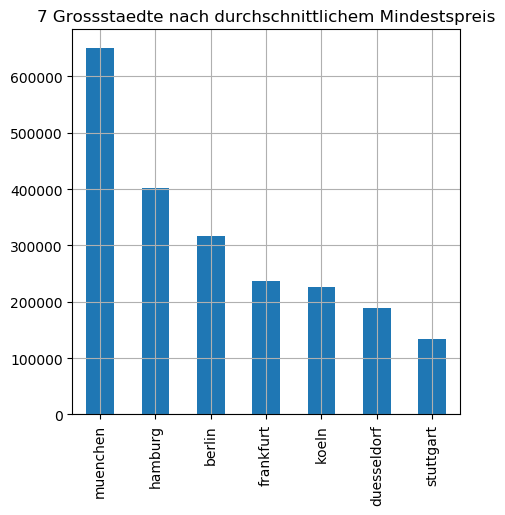

In [642]:
fig_cities = df_min_avg.sort_values(by =['durchschnittlicher Mindestkaufpreis'], ascending=False).plot(kind = 'bar', title = '7 Grossstaedte nach durchschnittlichem Mindestspreis', grid = True, figsize = (5,5), legend = False)
fig_cities.figure.savefig('Durchschnittlicher Mindestpreis pro Stadt.png', bbox_inches="tight")

In [325]:
dev_dict = {}
for dev in df['developer'].unique():
    dev_dict[dev] = [df[df['developer'] == dev]['min_price'].mean()]

In [307]:
dev_avg_min = pd.DataFrame(dev_dict)

In [310]:
dev_avg_mean = dev_avg_min.transpose()

In [424]:
dev_avg_mean.columns = ['Durchschnittlicher Mindestkaufpreis']

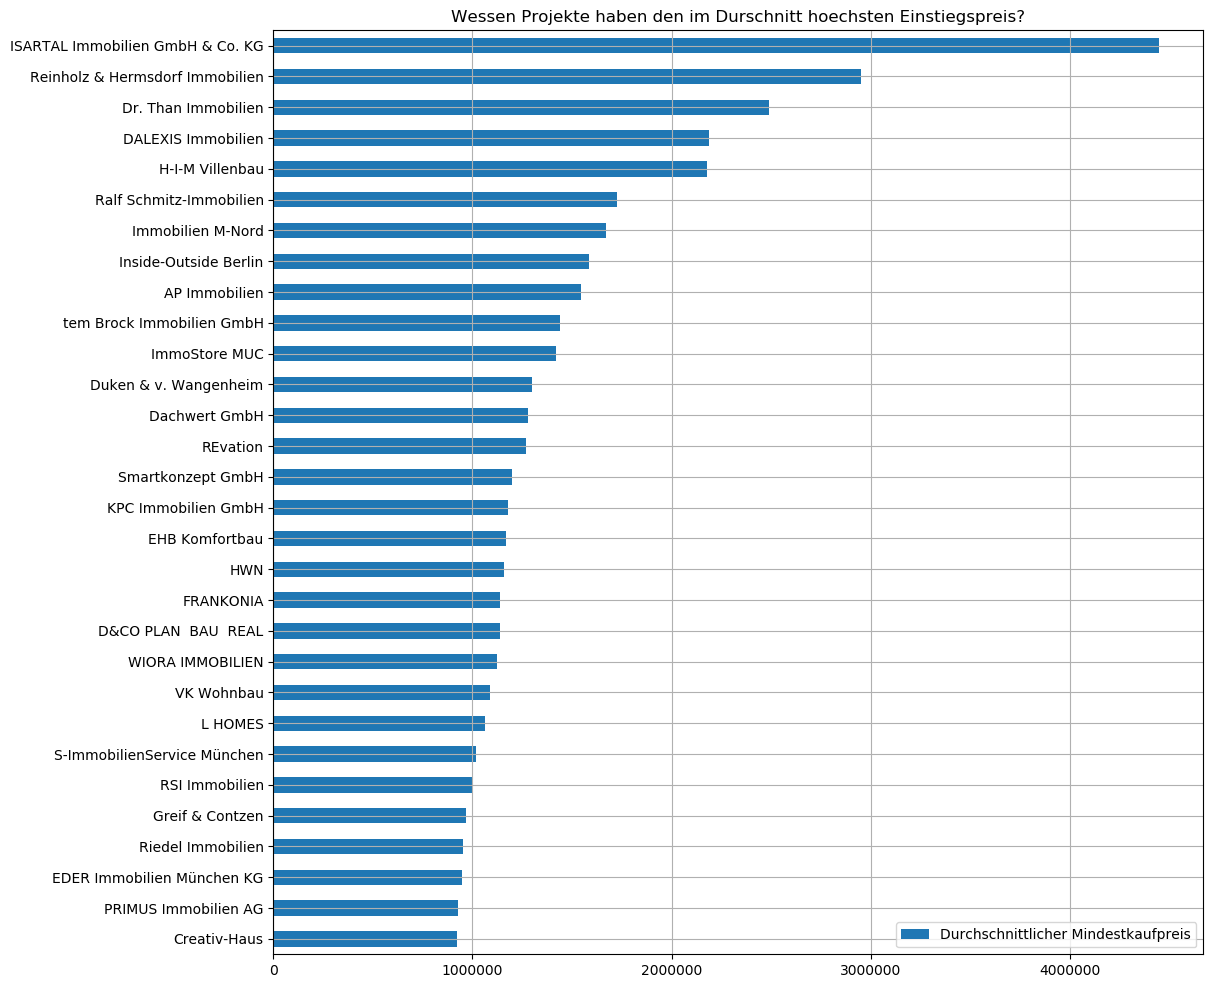

In [643]:
fig_allstars = dev_avg_mean.sort_values(by = ['Durchschnittlicher Mindestkaufpreis'], ascending = True)[-30::].plot(kind = 'barh', figsize = (12,12), grid = True, title = 'Wessen Projekte haben den im Durschnitt hoechsten Einstiegspreis?')
fig_allstars.figure.savefig('Gesamt Top 30 hoechste Einstiegspreise.png', bbox_inches = 'tight')

In [344]:
len(devs[::-30]['developer'].values)

14

In [644]:
devs_list = ['Thomas Klinke Immobilien', 'Krieger + Schramm', 'L HOMES',
       'Duken & v. Wangenheim', 'BEWOCON Berliner Wohnbau Consult',
       'FRANKONIA', 'INTERHOMES', 'JLL Residential', 'Behrendt Gruppe',
       'Creativ-Haus', 'Bartsch Immobilien', 'BIEN-RIES', 'DEMOS Wohnbau',
       'DEIN-HAUS', 'Aigner Immobilien', 'Nina Lillig Immobilien',
       'HI Wohnbau', 'Bietigheimer Wohnbau GmbH', 'BPD', 'PANDION',
       'PAESCHKE GmbH', 'Best Place Immobilien', 'Engel & Voelkers',
       'HELMA Wohnungsbau', 'RS-Wohnbau', 'Hermann Immobilien',
       'Grossmann & Berger',
       'ZIEGERT - Bank- und Immobilienconsulting GmbH',
       'PROJECT Immobilien', 'Bonava']

In [645]:
df['min_price'] = df['min_price'].map(lambda x: int(x.replace('auf Anfrage', str(0))))

AttributeError: 'int' object has no attribute 'replace'

In [646]:
dev_dict = {}
for developer in devs_list:
    dev_dict[developer] = df[df['developer']==developer]['min_price'].mean()

In [647]:
dev_averages = pd.DataFrame(dev_dict, index = [0])

In [648]:
dev_averages = dev_averages.transpose()

In [653]:
dev_averages.columns = ['Durchschnittlicher Mindestkaufpreis']

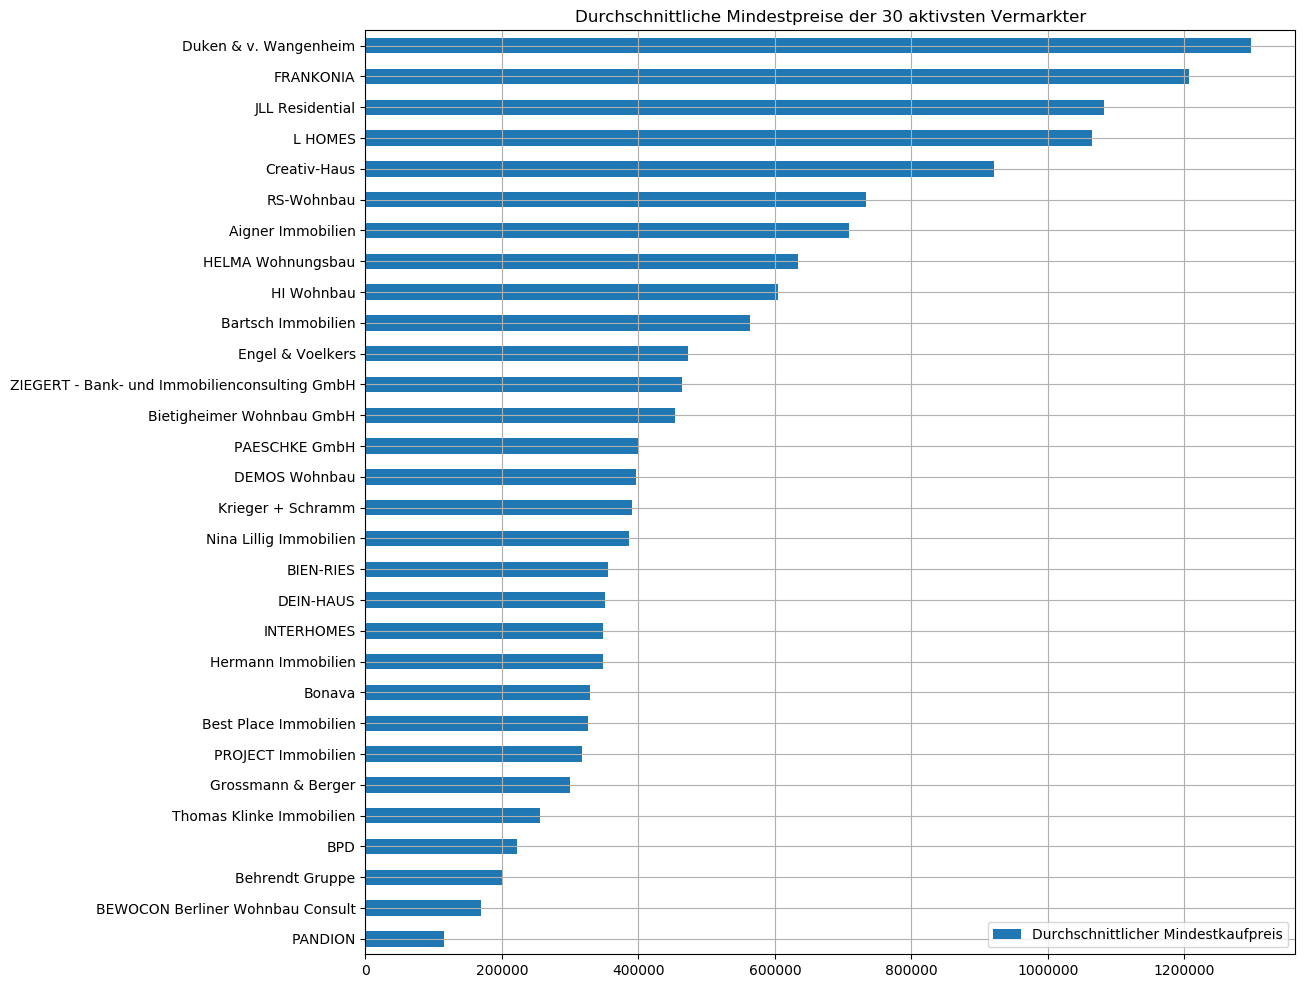

In [654]:
fig = dev_averages.sort_values(ascending = True, by = ['Durchschnittlicher Mindestkaufpreis']).plot(kind = 'barh', figsize = (12,12), grid = True, title = 'Durchschnittliche Mindestpreise der 30 aktivsten Vermarkter')
fig.figure.savefig('Top30 Durchschnittlicher Mindestkaufpreis.png', bbox_inches = 'tight')

In [655]:
import seaborn as sns

In [656]:
list_wise = []
for developer in devs_list:
    for price in df[df['developer'] == developer]['min_price']:
        list_wise.append([developer, price])


In [657]:
df_list_wise = pd.DataFrame(list_wise)

In [658]:
df_list_wise.columns = ['developer', 'min_price']

In [659]:
preprocessed = df_list_wise[df_list_wise['min_price'] != 0].sort_values(ascending = False, by = ['min_price'])

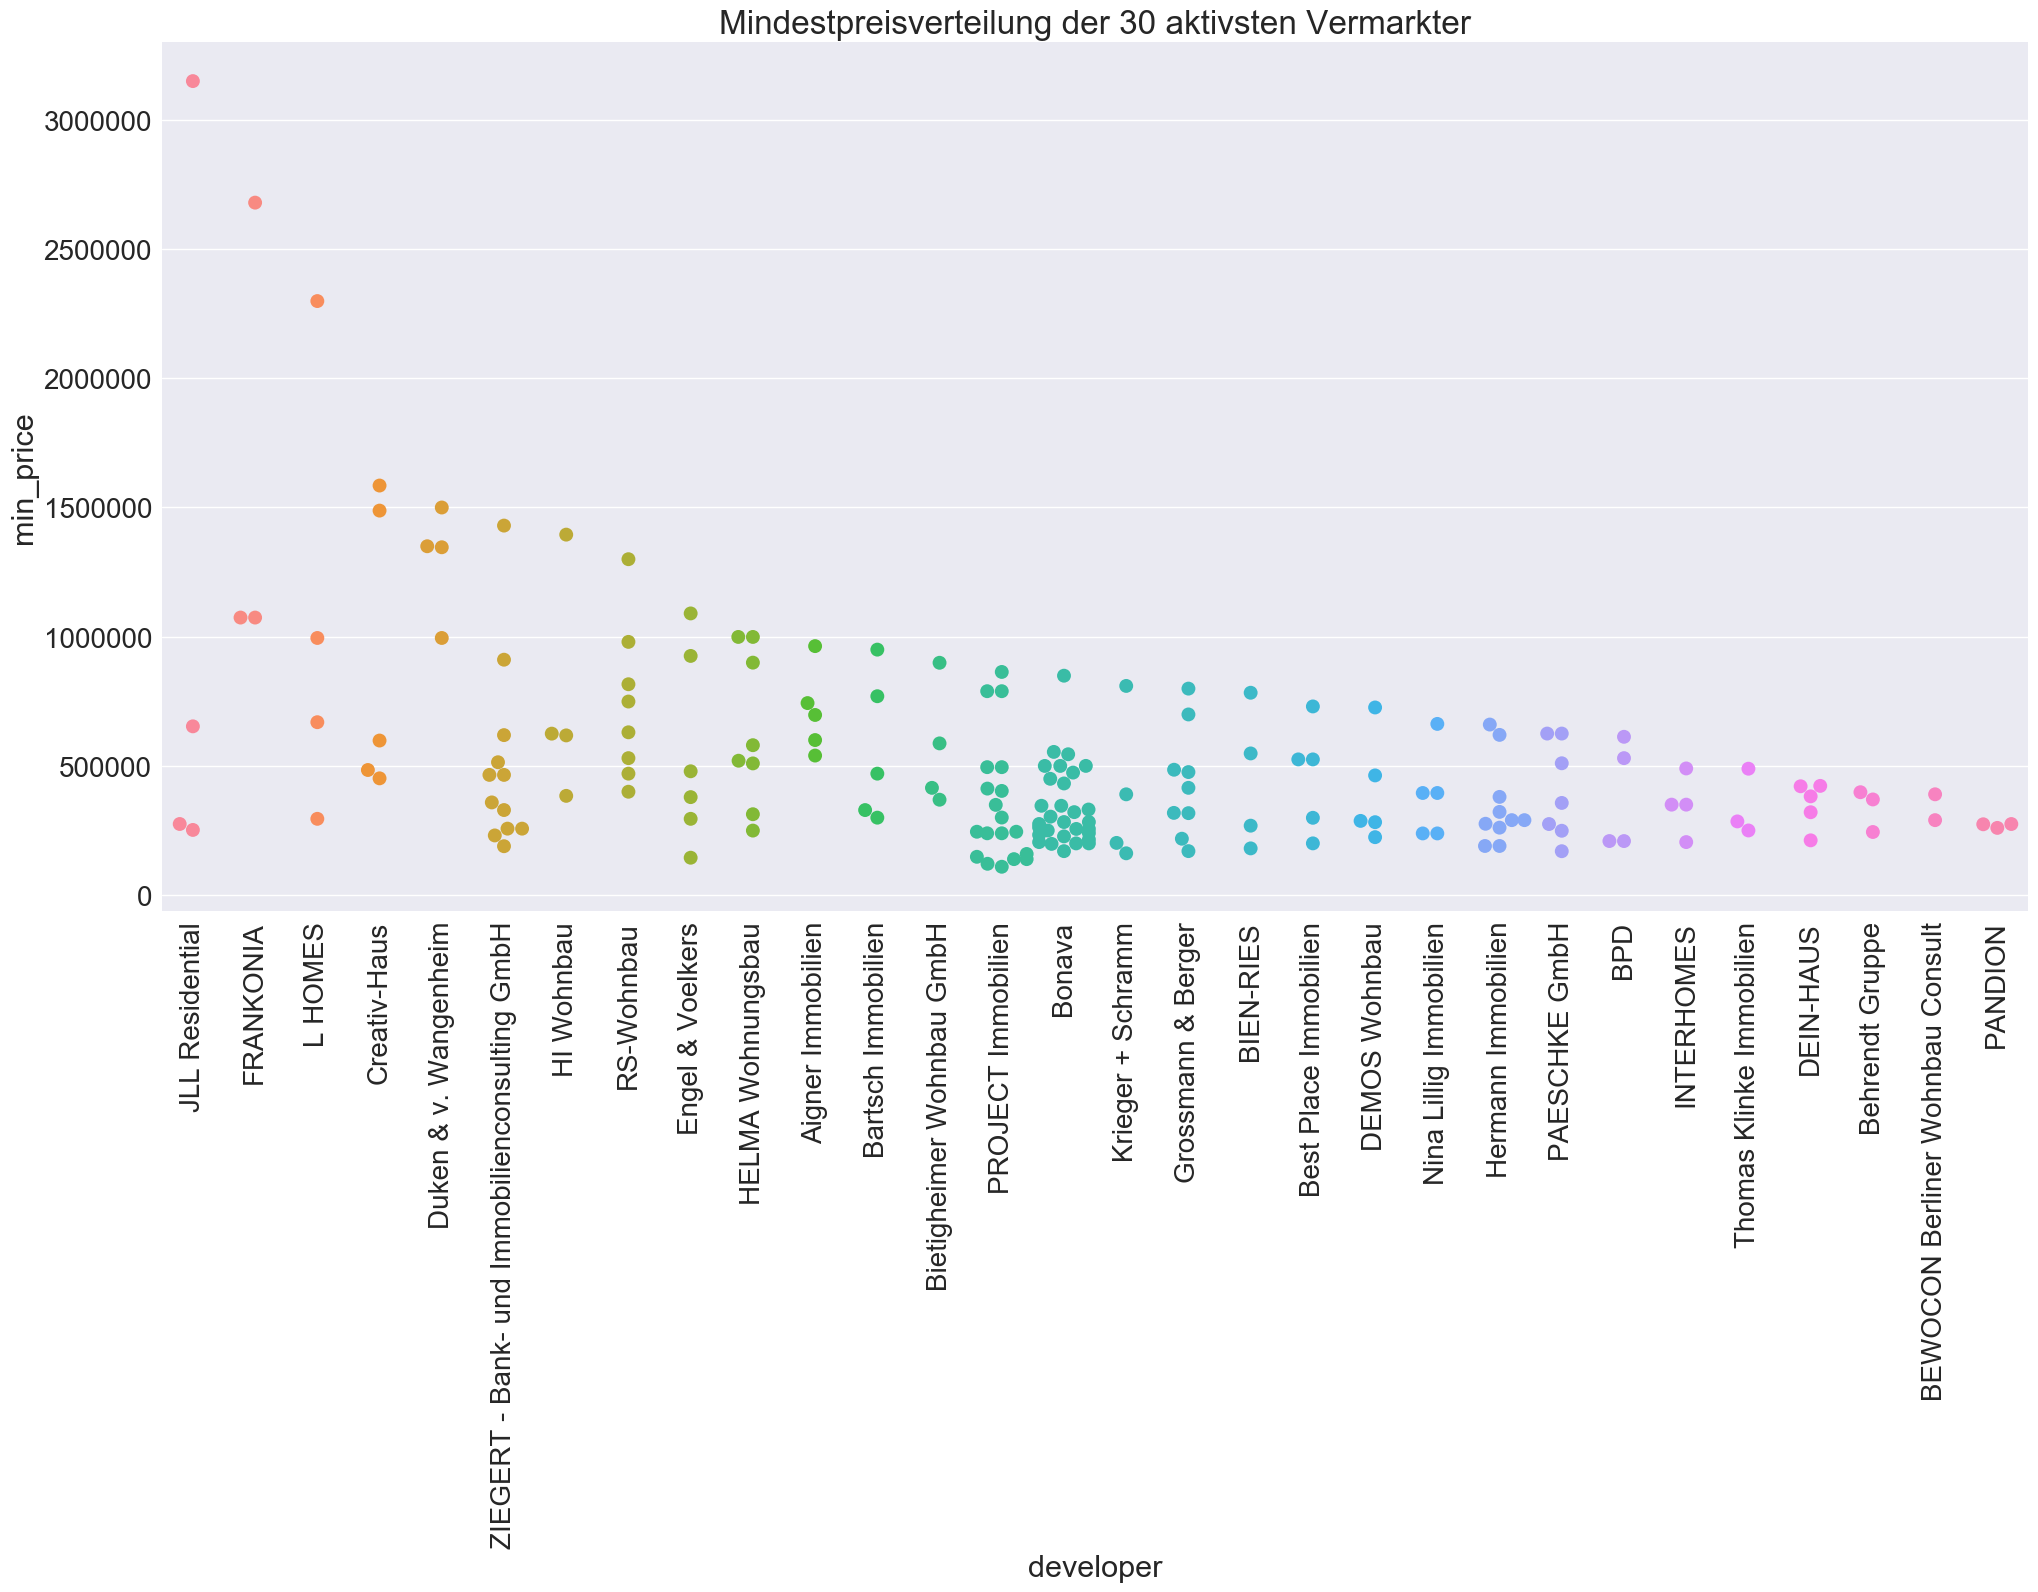

In [666]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.figsize = (50,50)
sns.set_style("darkgrid")
sns.set(font_scale = 2)
plt.xticks(rotation = 90)
plt.tight_layout()
figure = sns.swarmplot(ax=ax, data=preprocessed, x = 'developer', y= 'min_price', size = 10,)
figure.set_title('Mindestpreisverteilung der 30 aktivsten Vermarkter')
figure.figure.savefig('Mindestpreisverteilung der 30 aktivsten Vermarkter.jpg', bbox_inches="tight")